# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Just checking to see what the data looks like.

In [2]:
observations_df = pd.read_csv('./observations.csv')
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Another data check. We have 3 columns and 23296 rows, whoah, lots of rows!

In [3]:
observations_df.shape

(23296, 3)

Checked the data types - nice that the observations are already numbers.

In [4]:
observations_df.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [9]:
observations_df[observations_df.observations.isnull()]

,scientific_name,park_name,observations


There are no NA values for observations. Doesn't need obvious cleaning. Looks like we have some park data in this observations dataframe indcluding the scientific names of some animals, the park they were observed in, and how many observations of each animal. How many species are there?

In [17]:
print(observations_df.scientific_name.nunique())

5541


Ok there are 5541 unique species. I'm curious about these species. Are any observed more than others? What is observed the most?

In [22]:
observations_df.groupby('scientific_name').observations.sum().reset_index().sort_values('observations', ascending=False)

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
4109,Procyon lotor,1692
1359,Columba livia,1653
3322,Myotis lucifugus,1547
583,Bidens tripartita,1296
3494,Oxalis dillenii,1276


The most common observation is Steptopelia decacto, aka the Eurasian collared dove, followed by Holcus lanatus, aka Yorkshire fog. Would be a little more accessible if we knew some more info about these species, I think we'll get to that once we take a closer look at the next dataset. Let's take a look at this info in a barchart to see if there's anything interesting going on in the number of observations for species. Lets look at top species and bottom species.

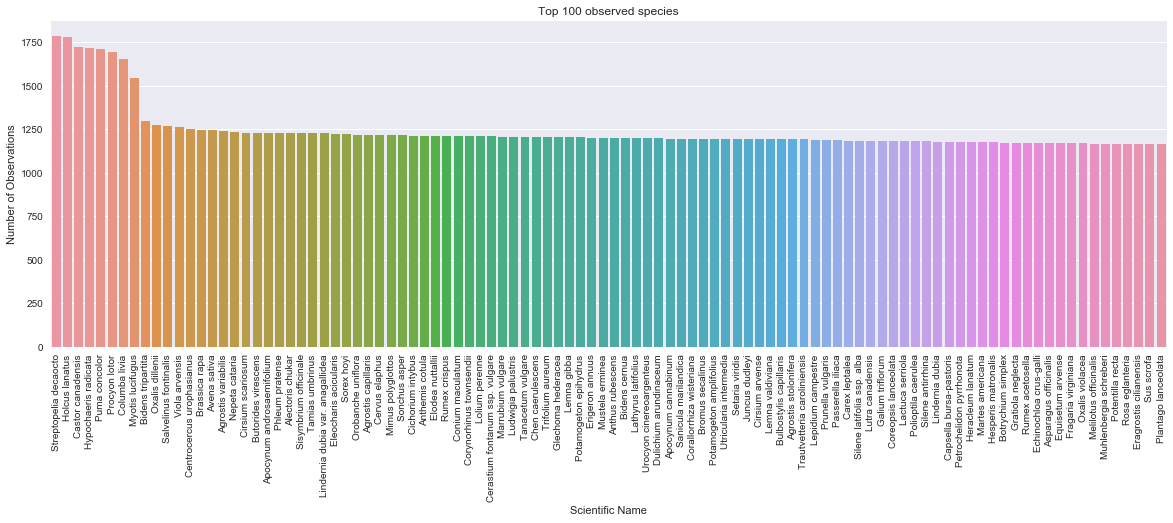

In [222]:
species_observation_df = observations_df.groupby('scientific_name').observations.sum().reset_index().sort_values('observations', ascending=False).head(100)
plt.figure(figsize=(20,6))
sns.barplot(data=species_observation_df, x='scientific_name', y='observations')
plt.ylabel('Number of Observations')
plt.xlabel('Scientific Name')
plt.xticks(rotation=90)
plt.title('Top 100 observed species')
plt.show()

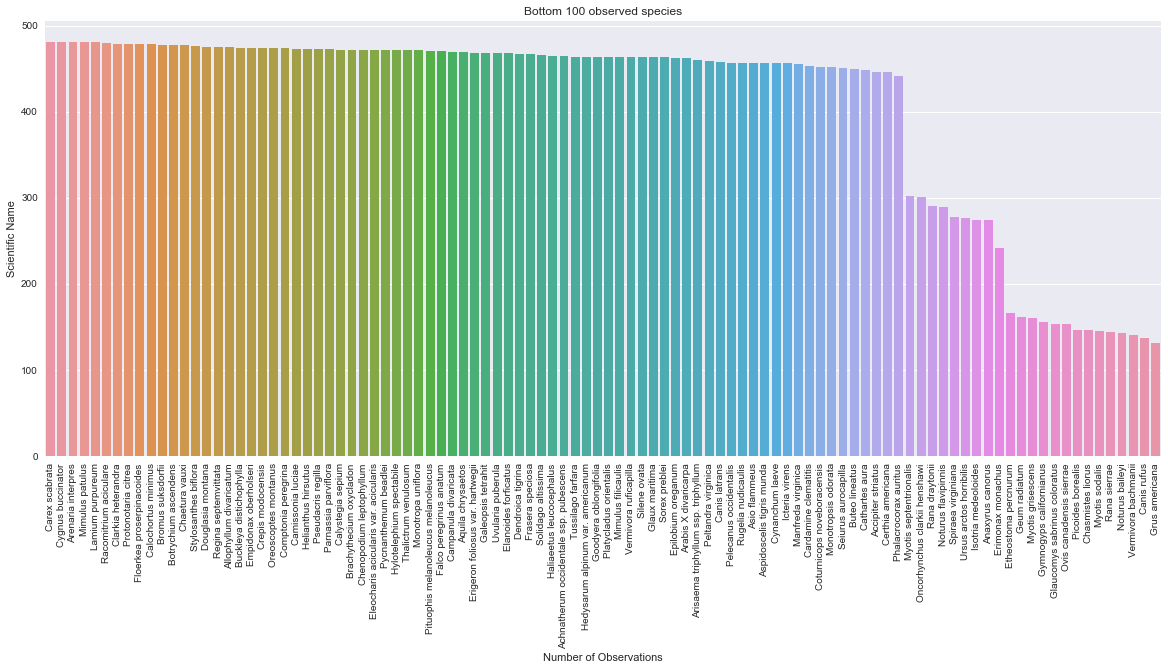

In [223]:
species_observation_df = observations_df.groupby('scientific_name').observations.sum().reset_index().sort_values('observations', ascending=False).tail(100)
plt.figure(figsize=(20,8))
sns.barplot(data=species_observation_df, x='scientific_name', y='observations')
plt.xticks(rotation=90)
plt.xlabel('Number of Observations')
plt.ylabel('Scientific Name')
plt.title('Bottom 100 observed species')
plt.show()

So we can see there are about 5 species that have observations above 1500 with the rest at around 1250 in the top 100. At the bottom end of observations looks like it levels off at about 500 observations then steps down to about 300 then to about 100. Could be interesting to dig into the observations per park for different species, but lets look at the parks first.

In [29]:
observations_df.park_name.nunique()

4

Sweet, there are four parks. I wonder how many observations there are per park?

In [30]:
observations_df.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


Interesting! Looks like Yellowstone National park has the most by about 600,000 observations. Lets see a bar chart of this information to visualize it.

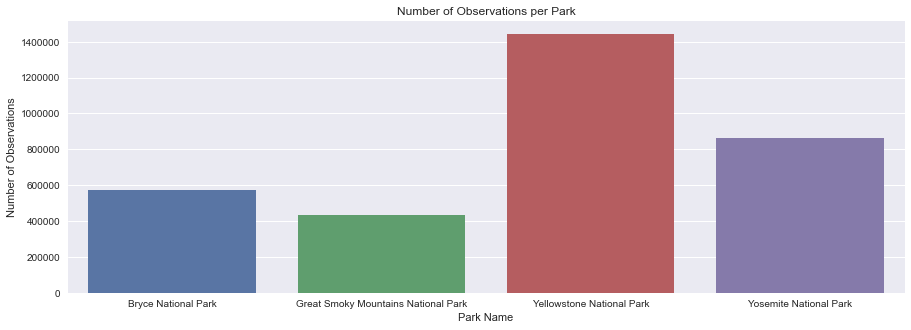

In [224]:
park_observations_df = observations_df.groupby('park_name').observations.sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(data = park_observations_df, x='park_name', y='observations')
plt.title('Number of Observations per Park')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.show()
#plt.legend(park_observations_df.park_name)

Wow, Yellowstone has way more observations. Lets take a closer look by examining the summary statistics

In [41]:
observations_df.groupby('park_name').agg(['mean', 'count', 'median', 'sum', 'std'])

observations                        \
                                            mean count median      sum   
park_name                                                                
Bryce National Park                    98.905391  5824     99   576025   
Great Smoky Mountains National Park    74.144918  5824     74   431820   
Yellowstone National Park             247.864354  5824    249  1443562   
Yosemite National Park                148.236951  5824    149   863332   

                                                
                                           std  
park_name                                       
Bryce National Park                  20.762061  
Great Smoky Mountains National Park  20.315457  
Yellowstone National Park            23.168872  
Yosemite National Park               21.221617

Here I used aggregate statistics to see what to look at next. We can observe that yellowstone national park has the highest mean number of observations. I wonder if that reflects the area of each park and not the observed frequency of each animal/staffing. That info isn't in this table. A quick google search shows that Bryce is 55.98 mi^2, Great Smokey Mountains is 816 mi^2, Yellowstone is 3471 mi^2, and Yosemite is 1169 mi^2. Let's see if we can't incorporate this information into our observations table to plot an observation density metric?

In [42]:
park_area_df = pd.DataFrame({'Bryce National Park': [55.98, 576025], 'Great Smoky Mountains National Park': [816, 431820], 'Yellowstone National Park': [3471, 1442562], 'Yosemite National Park': [1169, 863332]}, index=['area', 'observations_sum'])

In [49]:
park_area_df.head()

,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
area,55.98,816,3471,1169
observations_sum,576025.00,431820,1442562,863332


In [58]:
park_area_df_t = park_area_df.transpose().reset_index()
park_area_df_t.columns = ['Park_Name', 'area', 'observations_sum']
park_area_df_t.head()

,Park_Name,area,observations_sum
0,Bryce National Park,55.98,576025.0
1,Great Smoky Mountains National Park,816.00,431820.0
2,Yellowstone National Park,3471.00,1442562.0
3,Yosemite National Park,1169.00,863332.0


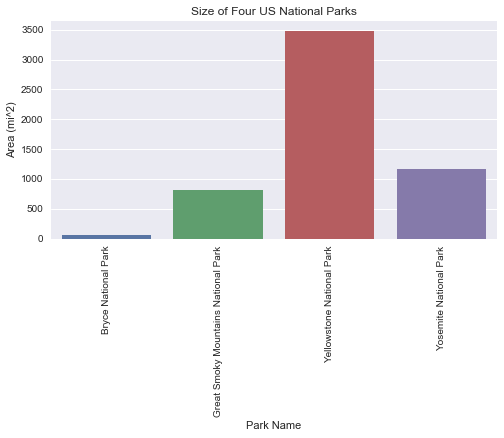

In [229]:
plt.figure(figsize=(8,4))
sns.barplot(data=park_area_df_t, x='Park_Name', y='area')
plt.ylabel('Area (mi^2)')
plt.xlabel('Park Name')
plt.title('Size of Four US National Parks')
plt.xticks(rotation=90)
plt.show()

In [59]:
park_area_df_t['obervation_density'] = park_area_df_t.observations_sum/park_area_df_t.area

In [60]:
park_area_df_t.head()

,Park_Name,area,observations_sum,obervation_density
0,Bryce National Park,55.98,576025.0,10289.835656
1,Great Smoky Mountains National Park,816.00,431820.0,529.191176
2,Yellowstone National Park,3471.00,1442562.0,415.604149
3,Yosemite National Park,1169.00,863332.0,738.521814


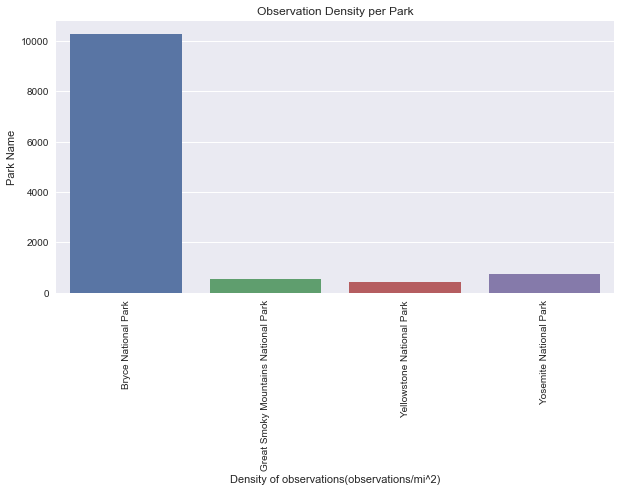

In [230]:
plt.figure(figsize=(10,5))
sns.barplot(data=park_area_df_t, x='Park_Name', y='obervation_density')
plt.title('Observation Density per Park')
plt.xlabel('Density of observations(observations/mi^2)')
plt.ylabel('Park Name')
plt.xticks(rotation=90)
plt.show()


Even though Bryce National Park had one of the lowest observations it had the highest obervation density by quite a bit! This shows that there were many more obervations in Bryce National Park per area. So either there are many more people making observations in Bryce or perhaps there are more animals to make observations on, either way we would need more data to tell, but this could be useful info to have if allocating resources(ranger time or conservation effort) towards one park or another.

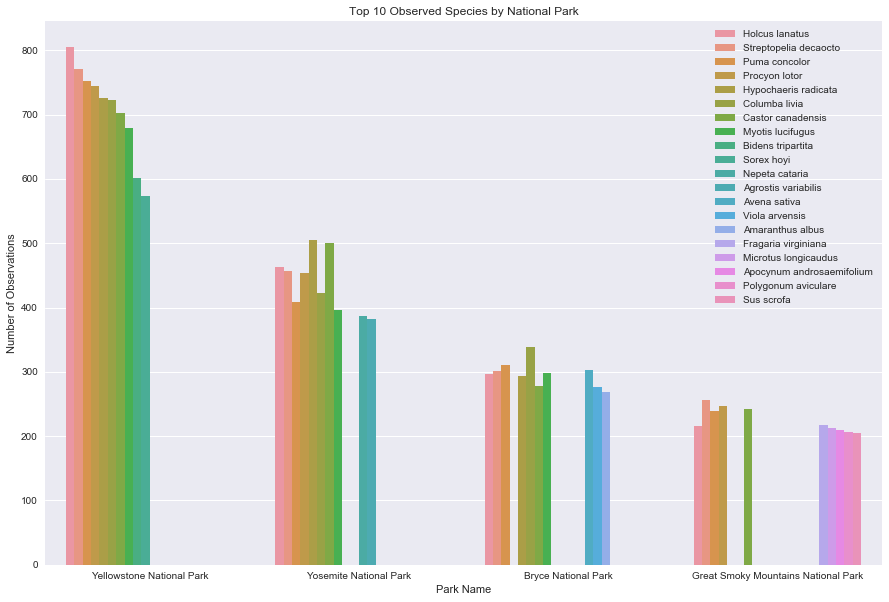

In [232]:
species_per_park_df = observations_df.groupby(['park_name', 'scientific_name']).observations.sum().reset_index().sort_values('observations', ascending=False).groupby('park_name').head(10).reset_index()
species_per_park_df.head()
plt.figure(figsize=(15,10))
sns.barplot(data=species_per_park_df, x='park_name', y='observations', hue='scientific_name')
plt.legend(loc='upper right')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.title('Top 10 Observed Species by National Park')
plt.show()

The last thing I wanted to examine in this data before checking out the next set of data in the species info was to see how many of each species were observed in each park. As expected Yellowstone has the most highly observations but we can see some similarities in the top species observations between parks. For example, Holcus lanatus which was the second most observed total is the top observation for Yellowstone, and in the top 10 for all the other parks. Yosemite's largest observation is Columba livia followed closely by Myotis lucifugus. Bryce National Park also had the highest observations for Columba livia but has some new species not seen in Yellowstone or Yosemite such as Viola arvensis and Amaranthus albus in the top 10. Great Smokey Mountains National Park also has some unique species in the top 10 observations sincluding Apocynum androsaemifolium and Polygonum aviculare. This info could be used to check what species would be most common to observe in each park. It could be used to help people interested in seeing certain species figure out what park they would want to travel too. I wonder what type of species are least observed too.

## Species Info

In [106]:
species_df = pd.read_csv('./species_info.csv')
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


So in the second file there is information about species and conservation status. First I want to see more about the dataset with the shape and dtypes.

In [107]:
species_df.shape

(5824, 4)

In [110]:
species_df.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

So we have 4 categorical variables, lets take a deeper look at the cateogry which could be interesting to dig deeper into.

In [114]:
species_df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [115]:
species_df.groupby(['category']).scientific_name.count()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

So there are 7 species categories with Vascular Plants dominating the total number of species, accouting for over 75% of the total entries. This could be important to keep in mind when we look further into this data. Next, what does the conservation status look like? 

In [117]:
species_df.groupby('conservation_status').scientific_name.count()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
Name: scientific_name, dtype: int64

So most of these appear to be blank. Group by won't work well with that, so lets fill in NaNs then break down the conservation status by category.

In [187]:
species_df.fillna('No Intervention', inplace = True)

In [188]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [189]:
species_df.groupby('conservation_status').scientific_name.count()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
Name: scientific_name, dtype: int64

fillna worked, we can see most of the entries for species have no conservations status

In [192]:
species_df.groupby(['category','conservation_status']).scientific_name.count().reset_index()

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
1,Amphibian,No Intervention,73
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,No Intervention,442
7,Bird,Species of Concern,72
8,Fish,Endangered,3
9,Fish,No Intervention,116


So this gives some more information but its pretty hard to visualize. Lets make a quick barchart to get some insight, drop the 'No Intervention' conservation status because it will dominate the figure obscuring the interesting information.

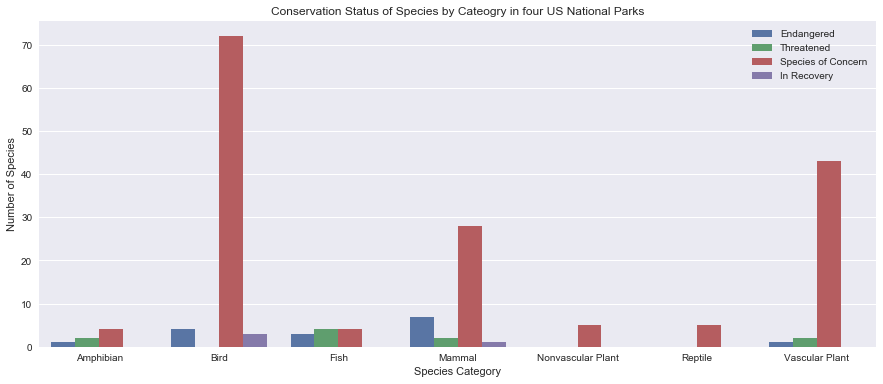

In [235]:
category_cons_status_df = species_df.groupby(['category','conservation_status']).scientific_name.count().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=category_cons_status_df, x= 'category', y='scientific_name', hue='conservation_status', hue_order=['Endangered', 'Threatened', 'Species of Concern', 'In Recovery'])
plt.ylabel('Number of Species')
plt.xlabel('Species Category')
plt.title('Conservation Status of Species by Cateogry in four US National Parks')
plt.legend(loc='upper right')
plt.show()

Lots easier to see here. So Birds category has the most species of concern, followed by mammals, then vascular plants. Endangered species maxes out for mammals category, still less than 10 though. Now that we have a pretty good idea of what the species dataframe looks like it would be interesting to merge the two together based on scientific name since this cateogry exists in both dataframes.

In [194]:
merged_df = pd.merge(left=observations_df, right=species_df, how='outer', on='scientific_name')
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention


Great, checking the top entries with head() we can see the merge looks like it was successful. This will allow us to look into some more interesting things that we couldn't see with the data separate. Let's first look at the number of observations of each category of species in the different parks.

In [195]:
merged_df.groupby(['park_name', 'category']).observations.sum().reset_index()

,park_name,category,observations
0,Bryce National Park,Amphibian,7542
1,Bryce National Park,Bird,58590
2,Bryce National Park,Fish,12823
3,Bryce National Park,Mammal,28830
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,8141
6,Bryce National Park,Vascular Plant,484373
7,Great Smoky Mountains National Park,Amphibian,5876
8,Great Smoky Mountains National Park,Bird,42869
9,Great Smoky Mountains National Park,Fish,9482


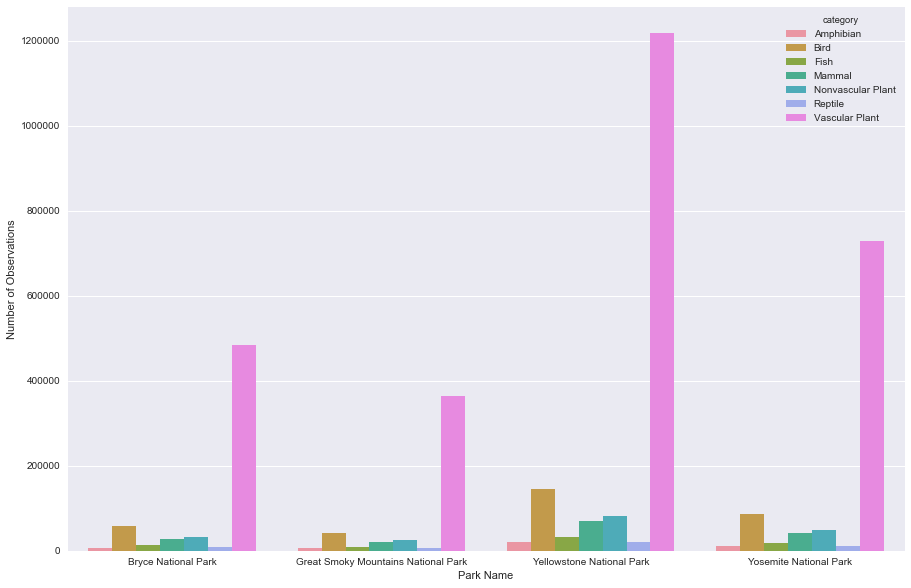

In [236]:
parks_an_obs = merged_df.groupby(['park_name', 'category']).observations.sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(data=parks_an_obs, x='park_name', y='observations', hue='category')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.show()

The vascular plants dominate the observations per park. We know from our previous analysis that over 75% of the species in our data are from vascular plants so this isn't too surprising. Again, we see the dominating factor of size of park in that the highest observed number of vascular plants is in Yellowstone National Park. 

In [198]:
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention


In [239]:
merged_df.groupby(['park_name','conservation_status'])

In [199]:
combined_df = pd.merge(left=obs_sum_df, right=species_df, how='left', on='scientific_name').drop('common_names', axis=1)
combined_df.head()

,park_name,scientific_name,observations,category,conservation_status
0,Bryce National Park,Abies bifolia,109,Vascular Plant,No Intervention
1,Bryce National Park,Abies concolor,83,Vascular Plant,No Intervention
2,Bryce National Park,Abies fraseri,109,Vascular Plant,Species of Concern
3,Bryce National Park,Abietinella abietina,101,Nonvascular Plant,No Intervention
4,Bryce National Park,Abronia ammophila,92,Vascular Plant,Species of Concern


In [200]:
combined_df.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,1139
1,Bryce National Park,In Recovery,648
2,Bryce National Park,No Intervention,728490
3,Bryce National Park,Species of Concern,21779
4,Bryce National Park,Threatened,755
5,Great Smoky Mountains National Park,Endangered,629
6,Great Smoky Mountains National Park,In Recovery,366
7,Great Smoky Mountains National Park,No Intervention,548085
8,Great Smoky Mountains National Park,Species of Concern,14925
9,Great Smoky Mountains National Park,Threatened,540


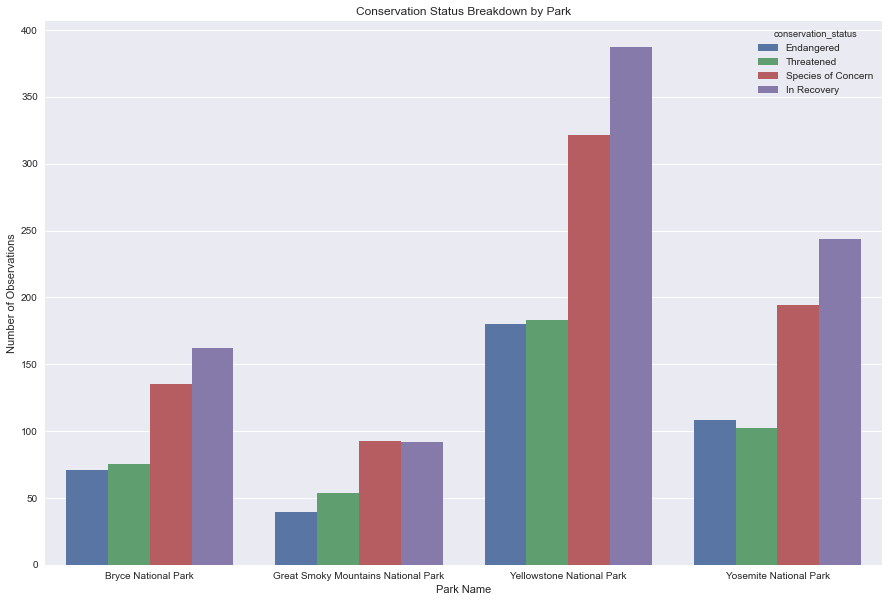

In [237]:
plt.figure(figsize=(15,10))
sns.barplot(data=combined_df, x='park_name', y='observations', hue='conservation_status', hue_order=['Endangered', 'Threatened', 'Species of Concern', 'In Recovery'], ci=None)
plt.title('Conservation Status Breakdown by Park')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.show()

In [202]:
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention


In [203]:
merged_df.groupby('category').common_names.nunique()

category
Amphibian              80
Bird                  481
Fish                  122
Mammal                205
Nonvascular Plant     246
Reptile                79
Vascular Plant       4291
Name: common_names, dtype: int64

In [204]:
category_df_endangered = merged_df[merged_df['conservation_status'] == 'Endangered'].groupby(['park_name', 'category']).observations.sum().reset_index()
category_df_endangered.head()

,park_name,category,observations
0,Bryce National Park,Amphibian,31
1,Bryce National Park,Bird,98
2,Bryce National Park,Fish,70
3,Bryce National Park,Mammal,395
4,Bryce National Park,Vascular Plant,25


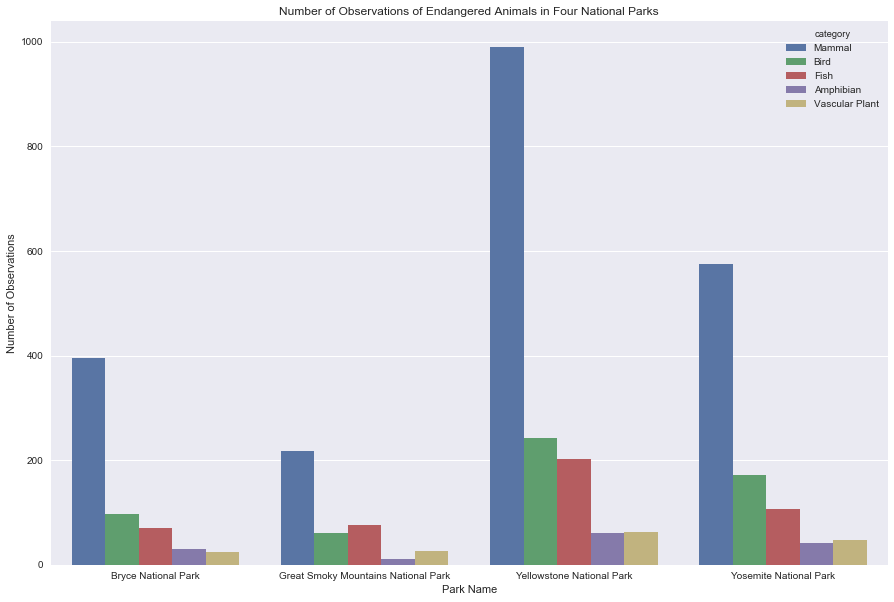

In [238]:
plt.figure(figsize=(15,10))
sns.barplot(data=category_df_endangered, x='park_name', y='observations', hue='category', hue_order=['Mammal', 'Bird', 'Fish', 'Amphibian', 'Vascular Plant'])
plt.title('Number of Observations of Endangered Animals in Four National Parks')
plt.ylabel('Number of Observations')
plt.xlabel('Park Name')
plt.show()

Endangered animals are the most at risk category. We can see here that we observe the most endangered mammals in Yellowstone National Park, therefore if we were to allocate resources to rescue these species we should use more resources to rescue mammals in Yellowstone National Park.